<a href="https://colab.research.google.com/github/mobarakol/AI_Medical_Imaging/blob/main/PCA_Vs_t_SNE_Vs_UMAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MNIST: Digits dataset<br>
<img src="https://datasets.activeloop.ai/wp-content/uploads/2019/12/MNIST-handwritten-digits-dataset-visualized-by-Activeloop.webp" alt="MNIST">


#PCA

Each Image dimention (8, 8)
Total Dimension: (1797, 64)


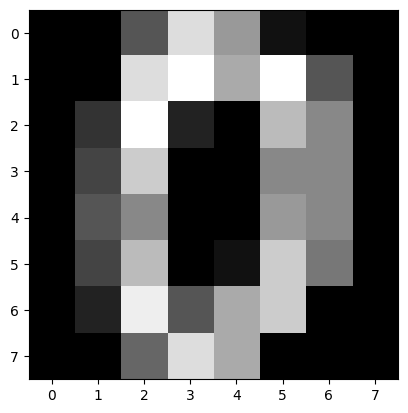

In [2]:
#importing the dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

digits = load_digits()
data = digits.data
print ('Each Image dimention', data[0,:].reshape(8,8).shape)
print('Total Dimension:',data.shape)

#taking a sample image to view
#Remember image is in the form of numpy array.
image_sample = data[0,:].reshape(8,8)
plt.imshow(image_sample, cmap='gray')

1. Reduce Image Dimensions

<ipython-input-8-a6eb6332e07d>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-8-a6eb6332e07d>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  c_map = plt.cm.get_cmap('jet', 10)


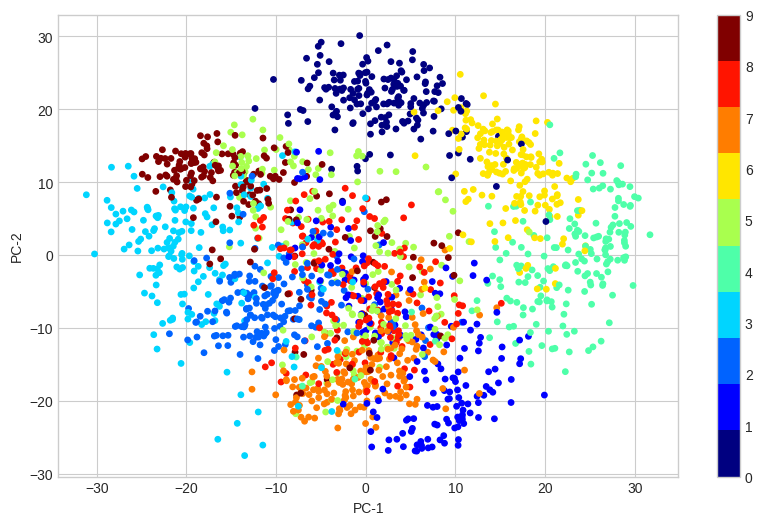

In [8]:
#Import required modules
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

digits = load_digits()

pca = PCA(2) # we need 2 principal components.
converted_data = pca.fit_transform(digits.data)

print('total dimension after PCA reduction:', converted_data.shape)

plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10,6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(converted_data[:, 0], converted_data[:, 1], s = 15,
            cmap = c_map , c = digits.target)
plt.colorbar()
plt.xlabel('PC-1') , plt.ylabel('PC-2')
plt.show()

#t-SNE

total dimension after t-SNE reduction: (1797, 2)


<Figure size 640x480 with 0 Axes>

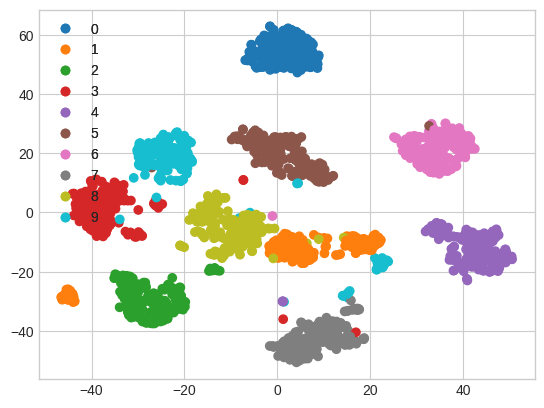

In [12]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

digits = load_digits()

X_embedded = TSNE().fit_transform(digits.data)

print('total dimension after t-SNE reduction:', X_embedded.shape)

plt.set_cmap('tab10')

fig, ax = plt.subplots()
scatter = ax.scatter(X_embedded[:,0],X_embedded[:,1],c=digits.target)

legend = ax.legend(*scatter.legend_elements(),loc="upper left")
ax.add_artist(legend)

plt.show()
plt.close()


#UMAP

In [4]:
!pip -q install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 3.6 MB/s eta 0:00:00


Restart the session, please!

Text(0.5, 1.0, 'UMAP')

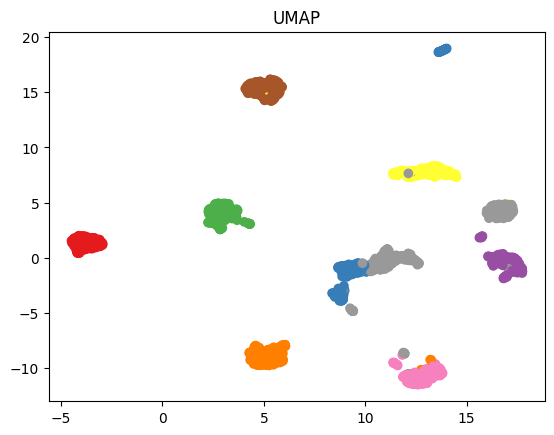

In [6]:
from umap import UMAP
from sklearn.datasets import load_digits

digits = load_digits()

X_UMAP = UMAP(n_neighbors=15,
                      min_dist=0.1,
                      metric='correlation').fit_transform(digits.data)

plt.scatter(X_UMAP[:,0], X_UMAP[:,1], c=digits.target, cmap='Set1')
plt.title("UMAP")

#Reduction to 3-dimension

In [34]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
import plotly.express as px

digits = load_digits()

pca = PCA(3) # we need 2 principal components.
converted_data = pca.fit_transform(digits.data)

fig = px.scatter_3d(
    converted_data, x=0, y=1, z=2, title='PCA',width=400, height=400,
    color=digits.target, labels={'color': 'digits'}
)
fig.update_traces(marker_size=8)
fig.show()


In [49]:
from sklearn.manifold import TSNE
import plotly.express as px
from sklearn.datasets import load_digits

digits = load_digits()

X_embedded = TSNE(n_components=3, random_state=0).fit_transform(digits.data)
fig = px.scatter_3d(
    X_embedded, x=0, y=1, z=2, title='t-SNE',width=400, height=400,
    color=digits.target, labels={'color': 'digits'}
)
fig.update_traces(marker_size=8)
fig.show()

In [50]:
from sklearn.manifold import TSNE
import plotly.express as px
from sklearn.datasets import load_digits

digits = load_digits()

X_UMAP = UMAP(n_components=3, n_neighbors=15,
                      min_dist=0.1,
                      metric='correlation').fit_transform(digits.data)

fig = px.scatter_3d(
    X_UMAP, x=0, y=1, z=2, title='UMAP',width=400, height=400,
    color=digits.target, labels={'color': 'digits'}
)
fig.update_traces(marker_size=8)
fig.show()